In [10]:
# Importing necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [11]:
# Reading csv file in the form of dataframe.
stroke = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [12]:
# A function to convert the stroke feature from integer to categorical.
def int_to_cat(val):
    if val == 1:
        return 'Stroke'
    else:
        return 'No Stroke'

# applying the given function to the dataframe.
stroke['class'] = stroke['stroke'].apply(int_to_cat)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,Stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,Stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,Stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,Stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,Stroke


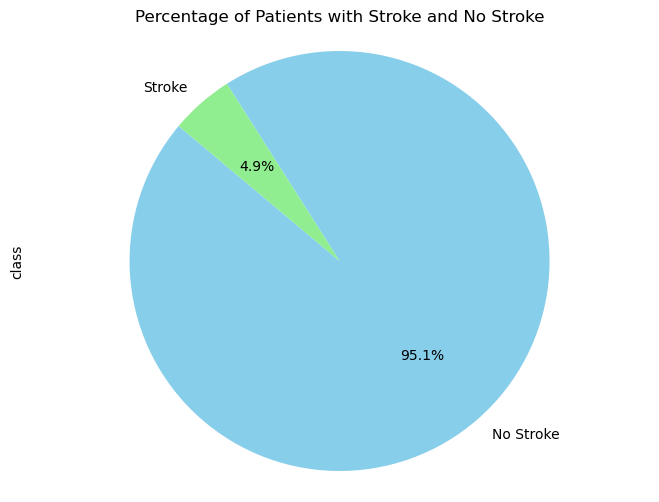

In [13]:
# Plotting the pie chart
plt.figure(figsize=(8, 6))
stroke['class'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightgreen'], startangle=140)
plt.title('Percentage of Patients with Stroke and No Stroke')
plt.axis('equal')  
plt.show()


    The given data is highly imbalanced and biased.

In [14]:
# drop the stroke column 
stroke.drop('stroke', axis=1, inplace=True)
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Stroke
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Stroke
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Stroke


# Univariate Analysis for the Continous Variables

In [15]:
# function to plot univariate features as we'll plotting for more than one feature
def univariate_plot(df,kind,col):
    if kind == 'boxplot':
        return sns.boxplot(x=df[col])
    elif kind == 'histplot':
        return sns.histplot(data=df, x=col, kde=False)
    else:
        return sns.kdeplot(data=df, x=col, fill=True)
    
    plt.figure(figsize=(12,6))
    plt.show()

In [16]:
#Function to group ages, BMI, and average glucose levels.
def group_data(row):
    # Age groups
    if row['age'] <= 1:
        age_group = 'Infants'
    elif row['age'] <= 12:
        age_group = 'Children'
    elif row['age'] <= 17:
        age_group = 'Teenager'
    elif row['age'] <= 44:
        age_group = 'Adult'
    elif row['age'] <= 60:
        age_group = 'Middle_Aged'
    else:
        age_group = 'Older_Adult'

    # BMI groups
    if row['bmi'] < 18.5:
        bmi_group = 'Underweight'
    elif row['bmi'] < 24.9:
        bmi_group = 'Healthy Weight'
    elif row['bmi'] < 29.9:
        bmi_group = 'Overweight'
    elif row['bmi'] < 40:
        bmi_group = 'Obesity'
    else:
        bmi_group = 'Severe Obesity'

    # Glucose groups
    if row['avg_glucose_level'] < 100:
        glucose_group = 'Normal'
    elif row['avg_glucose_level'] <= 125:
        glucose_group = 'Prediabetes'
    else:
        glucose_group = 'Diabetes'

    # Return all groups
    return pd.Series({'age_group': age_group,
                      'BMI_class': bmi_group,
                      'glucose_class': glucose_group})

# Apply the function to the data
stroke[['age_group', 'BMI_class', 'glucose_class']] = stroke.apply(group_data, axis=1)

# View the updated data
stroke.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,class,age_group,BMI_class,glucose_class
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Stroke,Older_Adult,Obesity,Diabetes
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Stroke,Older_Adult,Severe Obesity,Diabetes
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Stroke,Older_Adult,Obesity,Prediabetes
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,Stroke,Middle_Aged,Obesity,Diabetes
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Stroke,Older_Adult,Healthy Weight,Diabetes


# 1.Age

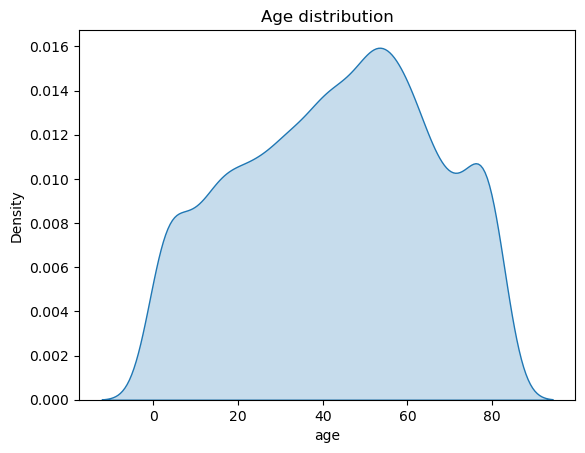

In [17]:
# Density plot for Age
univariate_plot(stroke, 'kdeplot', 'age')
plt.title("Age distribution")
plt.show()

Average age: 43.23 years


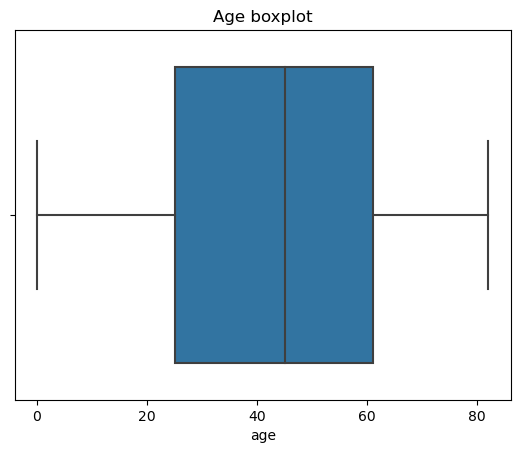

In [20]:
# Boxplot for age
print("Average age:", round(stroke["age"].mean(),2), "years")
univariate_plot(stroke, 'boxplot', 'age')
plt.title("Age boxplot")
plt.show()

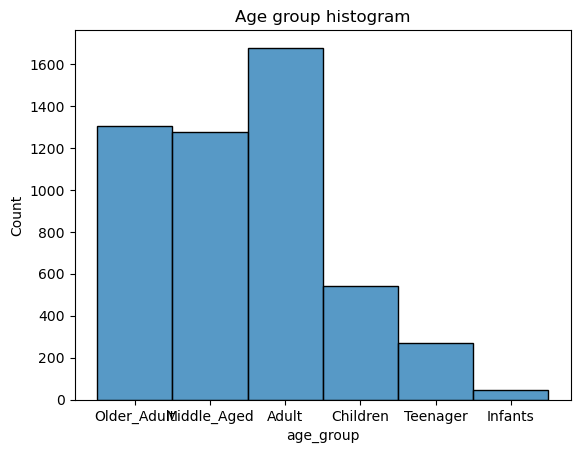

In [22]:
# Histogram for age
univariate_plot(stroke, 'histplot', 'age_group')
plt.title("Age group histogram")
plt.show()

Observations:

    1.Most patients in the dataset are adults with no outliers i.e there's no age out of the ordinary.
    2.There are more adults within the dataset.

# 2.Average Glucose Level

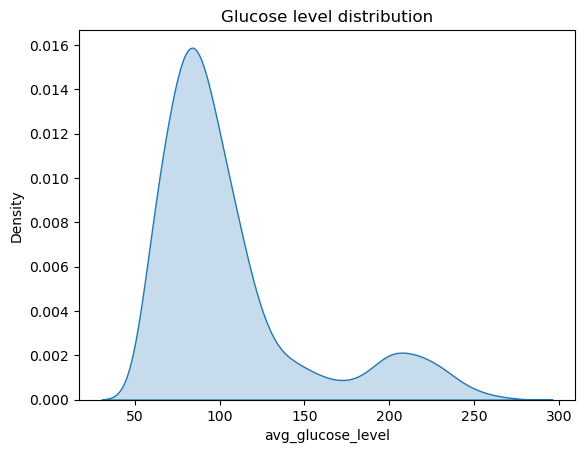

In [23]:
# Density plot for glucose level
univariate_plot(stroke, 'kdeplot', 'avg_glucose_level')
plt.title("Glucose level distribution")
plt.show()

AVG Glucose Level Median: 91.88499999999999


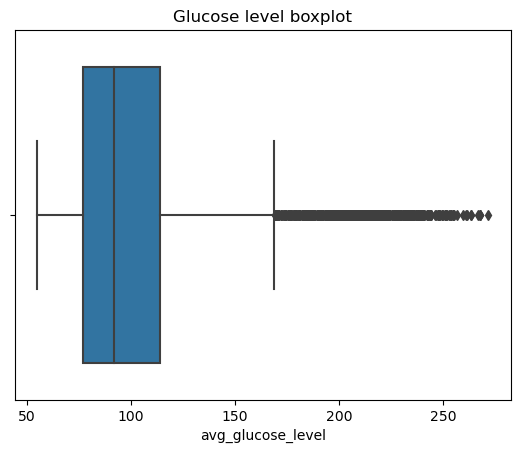

In [27]:
# Boxplot for average glucose level
print("AVG Glucose Level Median:", stroke['avg_glucose_level'].median())
univariate_plot(stroke, 'boxplot', 'avg_glucose_level')
plt.title("Glucose level boxplot")
plt.show()

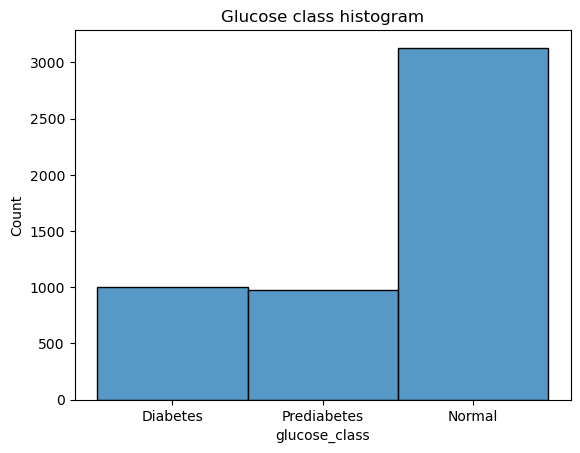

In [26]:
# Histogram for average glucose level
univariate_plot(stroke, 'histplot', 'glucose_class')
plt.title("Glucose class histogram")
plt.show()

Observations:

    1.The average glucose level in the data is right skewed.
    2.Most patients in the dataset has a normal average glucose level.
    3.The outliers in the boxplot are not really outliers, the values are real values, and they depict patients with diabetes

# 3.BMI

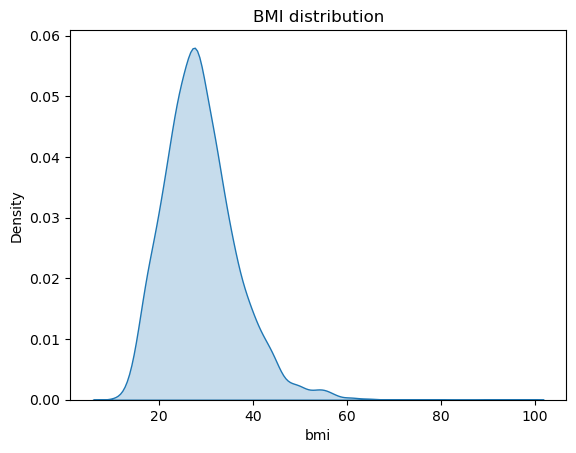

In [29]:
# Density plot for bmi
univariate_plot(stroke, 'kdeplot', 'bmi')
plt.title("BMI distribution")
plt.show()

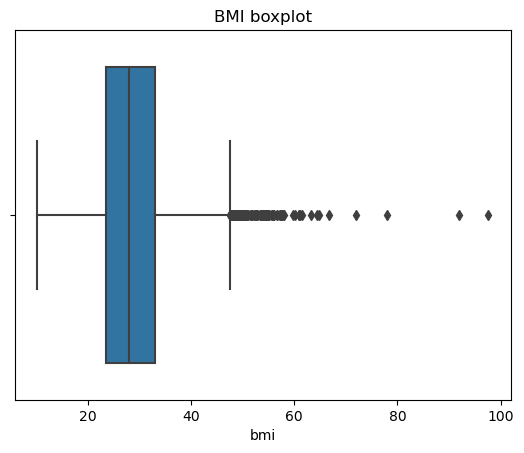

In [30]:
# Boxplot for bmi
univariate_plot(stroke, 'boxplot', 'bmi')
plt.title("BMI boxplot")
plt.show()

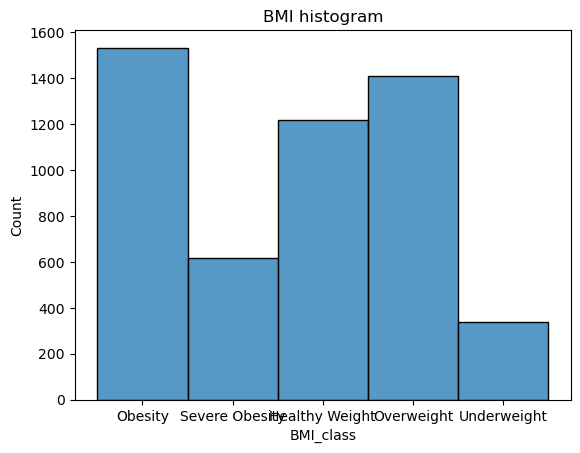

In [31]:
# Histogram for bmi
univariate_plot(stroke, 'histplot', 'BMI_class')
plt.title("BMI histogram")
plt.show()

Observations:

    1.Most patients aren't healthy in terms of BMI. There are more obesed and overweight patients than the ones with normal weight.
    2.There are outliers in the BMI column as well.

# Univariate Analysis for the Categorical Variables

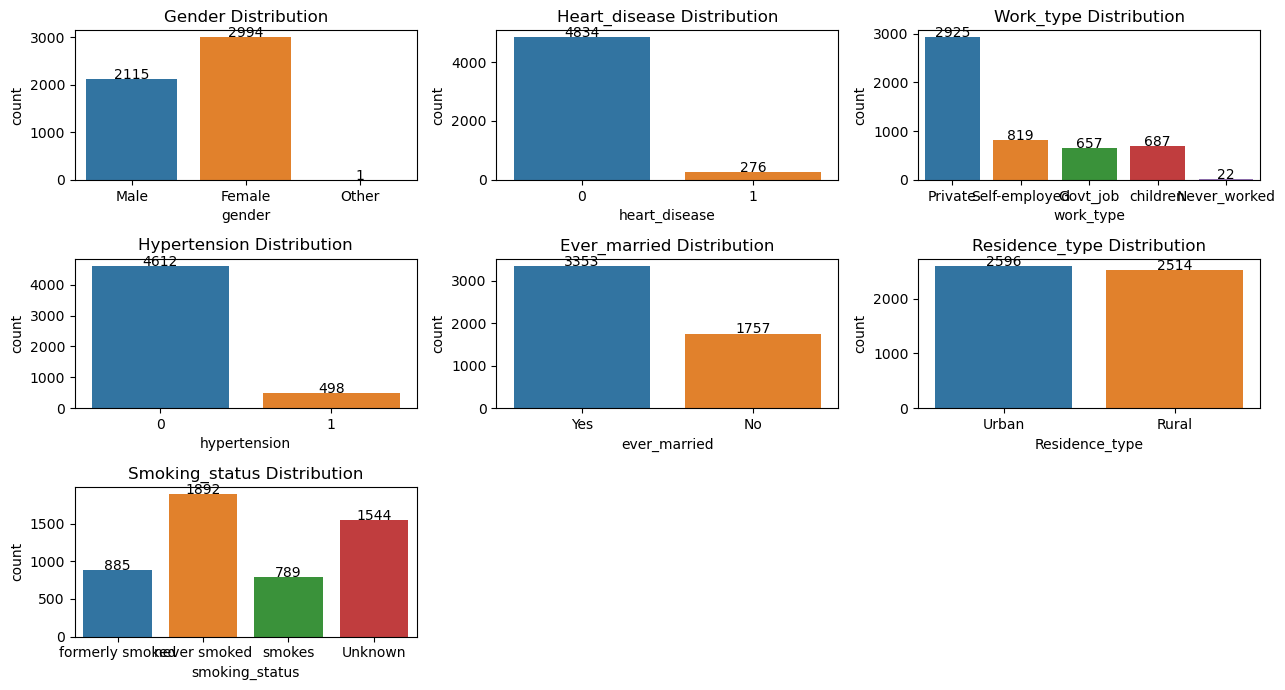

In [32]:
# create the figure and subplots
fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(13, 7))
fig.delaxes(axes[2, 1])
fig.delaxes(axes[2, 2])

# define the attributes to display and their corresponding subplot indices
attributes = ["gender", "heart_disease", "work_type", "hypertension", "ever_married", "Residence_type", "smoking_status"]
subplot_indices = [(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0)]

# use a loop to create count plots for each attribute
for idx, attr in enumerate(attributes):
    row_idx, col_idx = subplot_indices[idx]
    sns.countplot(x=stroke[attr], ax=axes[row_idx, col_idx])
    for patch in axes[row_idx, col_idx].patches:
        axes[row_idx, col_idx].text(patch.get_x() + patch.get_width() / 2, patch.get_height() + 5, '{:.0f}'.format(patch.get_height()), ha='center')
    axes[row_idx, col_idx].set_title(f"{attr.capitalize()} Distribution")

# adjust the spacing between subplots
plt.tight_layout()

# display the figure
plt.show()

Observations:

    1.We have more female in the dataset. Also there's a single patient whose gender is "Other".Since female is the mode of the gender feature, the patient with 'Other' will be re-categorised to female. This way, we'll have just 2 categories in the column.
    2.Most of the patients in the data are healthy in terms of heart disease.
    3.More than 50% of the patients work in the private sector.
    4.With the assumption that children can't work/never worked, we can move the instances of "children" category to the "Never_worked" category.
    5.90% of the patients are not hypertensive.
    6.We have more patients who have married at one stage in their life than those who haven't.
    7.We have almost equal amount of patients living in the Rural and Urban areas.

In [33]:
# Checking to count the number of patients who are less than 18 with the "Unknown" smoking status.
stroke[(stroke.smoking_status == 'Unknown') & (stroke.age < 18)].shape[0]

682

Observations:

    1.We have more patients that have never smoked in the dataset.
    2.We also have lots of "unknown" smoking status. Since we have 682 patients less than 18, we can make an assumption that they never smoked.

# Multivariate Data Analysis

# 1.Stroke distribution on age group

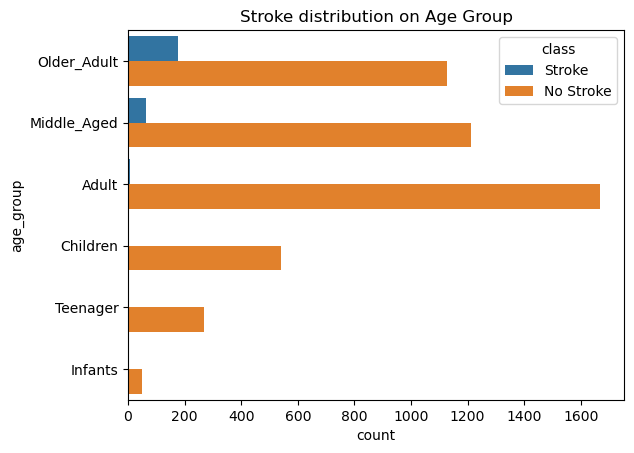

In [35]:
sns.countplot(data=stroke, y='age_group', 
              hue='class')
plt.title("Stroke distribution on Age Group")
plt.show()

Observation:

    1.More patients that are older than 40 years seems to have stroke with little number of patients less than   40 years having stroke.

# 2.Stroke distribution on Gender

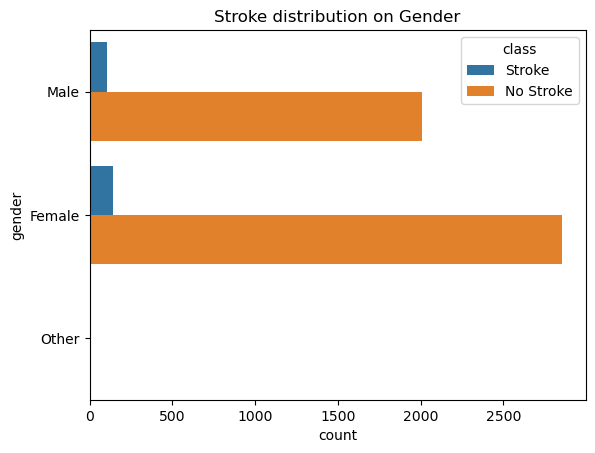

In [43]:
sns.countplot(data=stroke, y='gender', 
              hue='class')
plt.title("Stroke distribution on Gender")
plt.show()

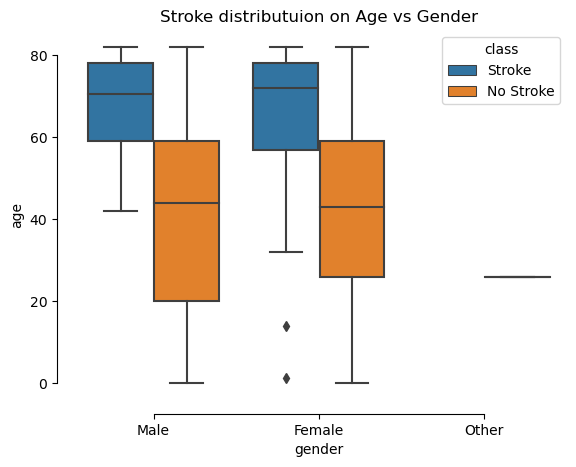

In [37]:
sns.boxplot(x="gender", y="age",
            hue="class",
            data=stroke)
sns.despine(offset=10, trim=True)
plt.title("Stroke distributuion on Age vs Gender")
plt.show()

In [41]:
# Checking the details of the two outliers in the above plot
stroke[(stroke.gender == 'Female') & (stroke.age < 20) & (stroke['class'] == 'Stroke')]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,class,age_group,BMI_class,glucose_class
162,69768,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,Stroke,Children,Severe Obesity,Normal
245,49669,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,Stroke,Teenager,Obesity,Normal


Observations:

    1.The males in the data tend to have stroke at age over 40, while women tends to have stroke from age around 30s.
    2.There are two children (less than 18 years) that have stroke.

# 3.Stroke distribution on different BMI class

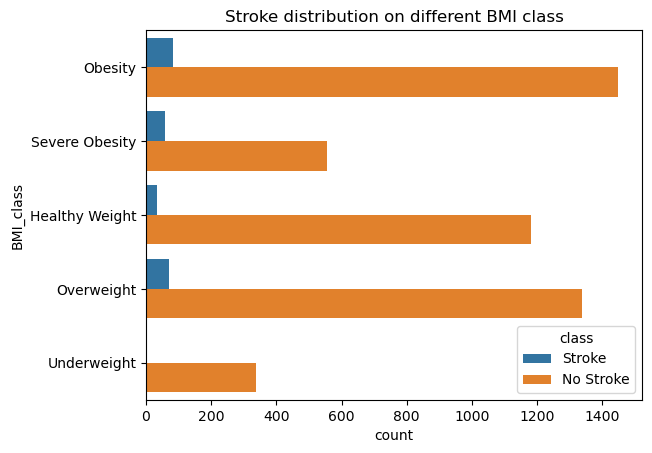

In [42]:
sns.countplot(data=stroke, y='BMI_class', 
              hue='class')
plt.title("Stroke distribution on different BMI class")
plt.show()

Observations:

    1.The underweight patient are the least class that has stroke, followed by the healthy weight class.
    2.Stroke seems to occur in patients with overweight, obesity, and class III obesity.

# 4.Stroke distribution on AVG Glucose Level Class

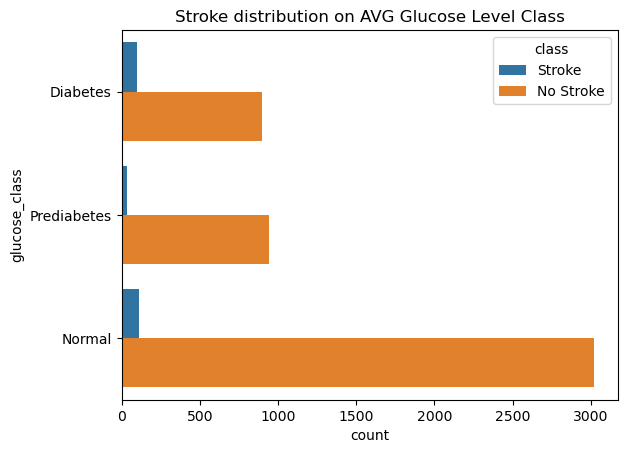

In [45]:
sns.countplot(data=stroke, y='glucose_class', 
              hue='class')
plt.title("Stroke distribution on AVG Glucose Level Class")
plt.show()

Observations:

    1.We have more patients with normal glucose level, and very few of them have stroke.
    2.The patients with prediabetes and diabetes that has stroke are lesser than those with normal glucose         level.

# 5.Stroke distribution on Hypertension and Heart disease

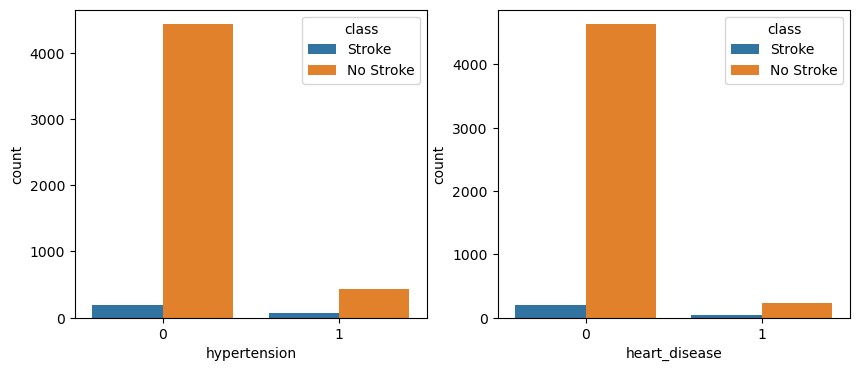

In [47]:
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(10,4))
sns.countplot(data=stroke, x='hypertension', 
              hue='class', ax=ax0)

sns.countplot(data=stroke, x='heart_disease', 
              hue='class', ax=ax1)
plt.show()

Observation:

    1.Patients who does not have hypertension have stroke than those that does not have hypertension.
    2.Also, patients who does not have heart disease have stroke than those that does not have heart disease.

# 6.Stroke on marital status and type of work

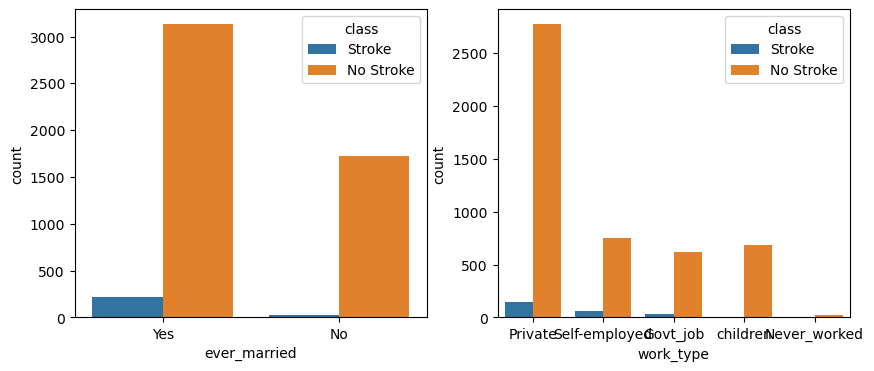

In [48]:
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(10,4))
sns.countplot(data=stroke, x='ever_married', 
              hue='class', ax=ax0)

sns.countplot(data=stroke, x='work_type', 
              hue='class', ax=ax1)
plt.show()

Observations:

    1.Patients who are married at a point in their life have stroke than those that have never married.
    2.More patients from the private sector has stroke, followed by the self employed, and govt workers             respectively.
    3.More insights could have been determined if we are able to know the industry these patients work.

# 7.Stroke distribution on type of residence and smoking status

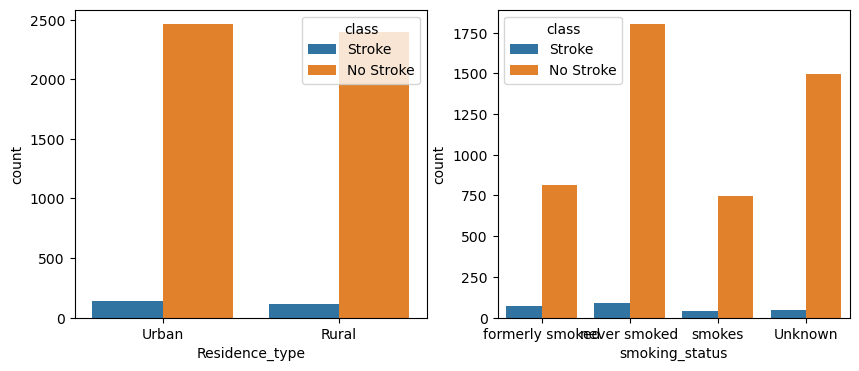

In [49]:
fig, (ax0,ax1) = plt.subplots(ncols=2, figsize=(10,4))
sns.countplot(data=stroke, x='Residence_type', 
              hue='class', ax=ax0)

sns.countplot(data=stroke, x='smoking_status', 
              hue='class', ax=ax1)
plt.show()

Observations:

    1.Patients with stroke is almost evenly spread across the rural types.
    2.Combination of patients that formely smoked and those that smokes have stroke than those that never           smoked.
    3.We also have lots of unknown smoking status that has stroke

# Heatmap

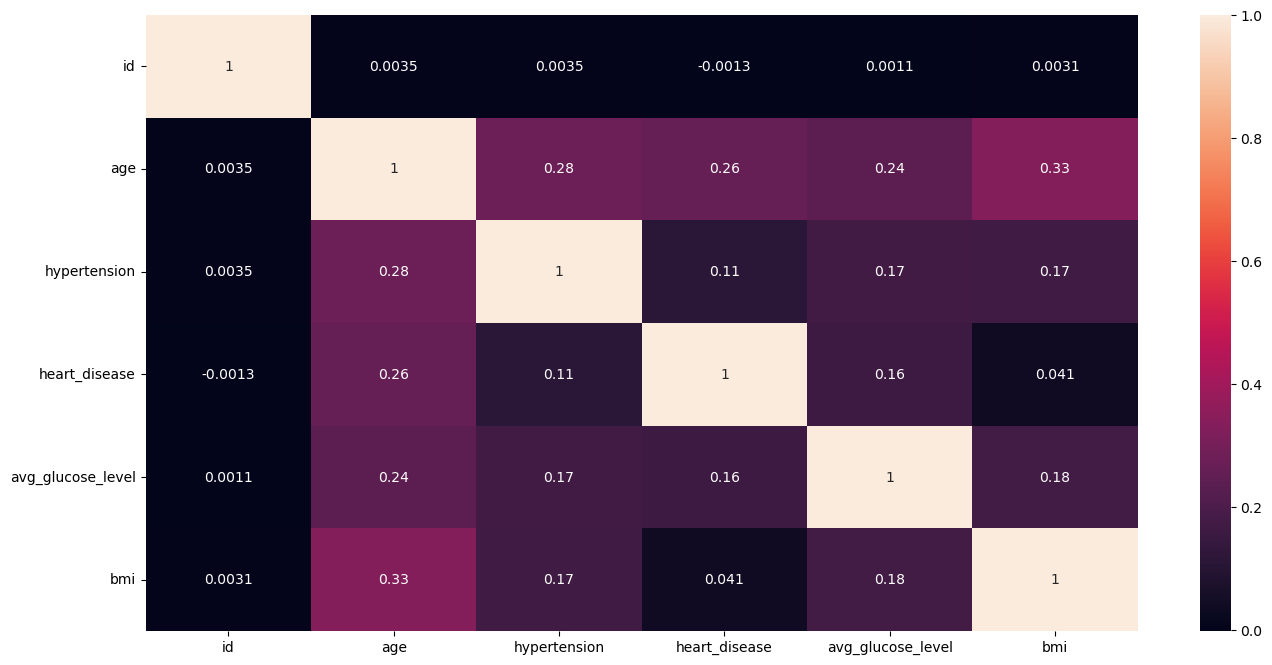

In [50]:
# Standard correlation coefficients of features
plt.figure(figsize=(16,8))
sns.heatmap(stroke.corr(),annot=True);

Observation: 

    1.BMI is the least correlated with stroke, and age is the most correlated to stroke amongs the numerical       features.

In [53]:
# Writing the combined dataframe to a new CSV file
stroke.to_csv('healthcare-dataset-stroke-data-version-2.csv',index=False)